In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch


### Antes de cambiar las configuraciones

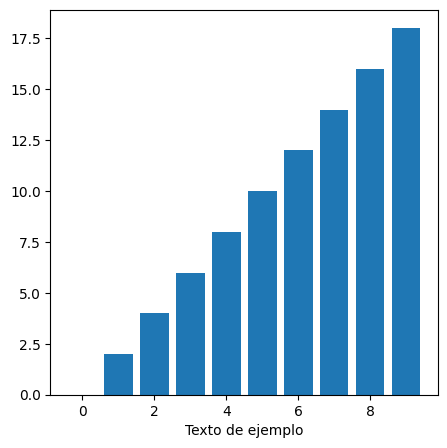

In [5]:
x = np.arange(10)
y = 2*x

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.bar(x, y)
ax.set_xlabel("Texto de ejemplo")
#plt.savefig(os.path.join(save_dir, "test_before.png"))

### Después de cambiar las configuraciones

La siguiente celda contiene muchas cosas (de hecho, vuelve a importar librerías que ya están en el ambiente, pero eso no es problemático). El fin de esto es que, para generar el estilo deseado en los gráficos de otros notebooks, sólo sea necesario copiar esta celda.

In [116]:
# This cell set up all the required styling

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch

MAIN_COLOR = "#37539C"

BLUE_PALETTE = [
    "#869CD4",
    "#4969BE",
    "#4062BB",
    "#354F95",
    "#2D4175",
    "#27355A"
]

COLOR_PALETTE = [
    MAIN_COLOR,
    "#59C3C3",
    "#F45B69",
    "#52489C",
    "#9FB7B9",
    "#EBEBEB",
    "#4062BB",
    "#46B1C9",
    "#84C0C6",
    "#BCC1BA",
    "#F2E2D2"
]

def install_open_sans():
  """Install Open Sans fonts from directory, and set them as the default
  """
  fonts_dir = "./CTCI/Panorama CTCI/Diseño/open_sans_fonts"
  for font_path in os.listdir(fonts_dir):
    full_path = os.path.join(fonts_dir, font_path)
    fontManager.addfont(full_path)

def set_properties(font_family, main_color, color_palette):
  # Set font
  mpl.rc('font', family=font_family)
  # Set font weight to bold in everything
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["axes.titleweight"] = "bold"
  mpl.rcParams["axes.labelweight"] = "bold"

  # Set color of text, labels and ticks
  mpl.rcParams['text.color'] = main_color
  mpl.rcParams['axes.labelcolor'] = main_color
  mpl.rcParams['xtick.color'] = main_color
  mpl.rcParams['ytick.color'] = main_color

  # Set default colormap
  mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_palette)

  # Set thant only left and bottom plot spines should be visible
  # (instead of a whole square around the plot)
  mpl.rcParams['axes.spines.left'] = True
  mpl.rcParams['axes.spines.bottom'] = True
  mpl.rcParams['axes.spines.right'] = False
  mpl.rcParams['axes.spines.top'] = False

  # Set horizontal grid
  mpl.rcParams["axes.grid"] = True
  mpl.rcParams["axes.grid.axis"] = "y"
  mpl.rcParams["grid.linestyle"] = "--"

  # Set default linestyle and marker
  mpl.rcParams["lines.linestyle"] = "-"
  mpl.rcParams["lines.marker"] = "o"

  # Set default DPI for image saving (300 is the mininum recommended for printing)
  mpl.rcParams['savefig.dpi'] = 300


install_open_sans()
set_properties("Open Sans", MAIN_COLOR, COLOR_PALETTE)


def round_corners(ax,
                  pad=-0.004,
                  rounding_size=0.1,
                  mutation_scale=1,
                  mutation_aspect=4):
  new_patches = []
  old_bottom, old_top = ax.get_ylim()

  for patch in reversed(ax.patches):
      bb = patch.get_bbox()
      if bb.height == 0:
        new_patches.append(patch)
        patch.remove()
        continue
      color=patch.get_facecolor()
      p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                          abs(bb.width), abs(bb.height),
                          boxstyle=f"round,pad={pad},rounding_size={rounding_size}",
                          ec="none", fc=color,
                          mutation_aspect=mutation_aspect,
                          mutation_scale=mutation_scale
                          )
      patch.remove()
      new_patches.append(p_bbox)
  for patch in new_patches:
      ax.add_patch(patch)

  # Fix ylim
  ax.set_ylim(old_bottom, old_top)

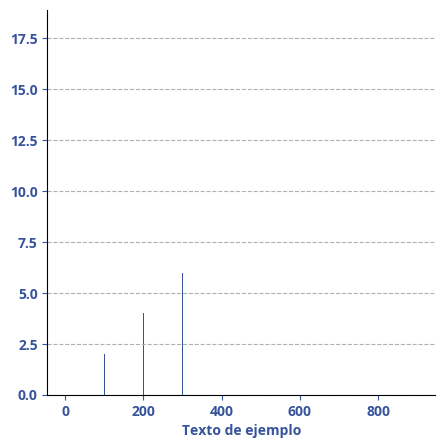

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.bar(x, y)
ax.set_xlabel("Texto de ejemplo")
#plt.savefig(os.path.join(save_dir, "test_after.png"))


### Redondear esquinas

0.8 0.0
0.7999999999999999 2.0
0.8000000000000003 4.0
0.8000000000000003 6.0
0.8000000000000003 8.0
0.7999999999999998 10.0
0.7999999999999998 12.0
0.7999999999999998 14.0
0.8000000000000007 16.0
0.8000000000000007 18.0


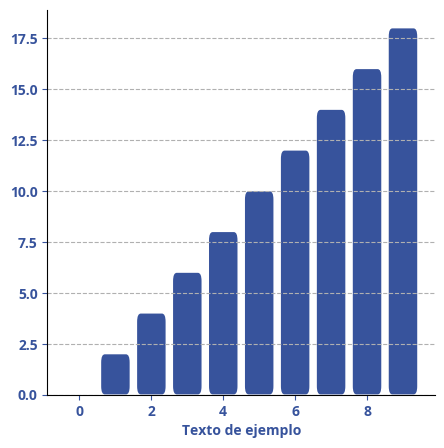

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.arange(10)
y = 2*x
ax.bar(x, y)
ax.set_xlabel("Texto de ejemplo")
# Here we call the function to round the corners
round_corners(ax, mutation_aspect=4)
#plt.savefig(os.path.join(save_dir, "test_rounded.png"))

for patch in reversed(ax.patches):
  bb = patch.get_bbox()
  print(bb.width, bb.height)

In [166]:
ax.get_xlim(), ax.get_ylim()

((-0.8900000000000001, 9.89), (0.0, 18.9))

0.8 0.0
0.7999999999999972 200.0
0.8000000000000114 400.0
0.8000000000000114 600.0
0.8000000000000114 800.0
0.8000000000000114 1000.0
0.7999999999999545 1200.0
0.7999999999999545 1400.0
0.7999999999999545 1600.0
0.7999999999999545 1800.0
(-45.44, 945.4399999999999) (0.0, 1890.0)


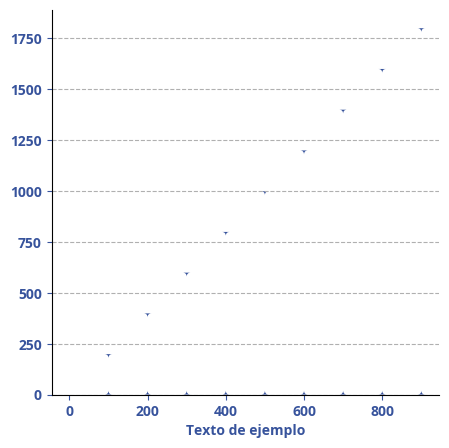

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.arange(0, 1000, 100)
y = 2*x
ax.bar(x, y)
ax.set_xlabel("Texto de ejemplo")
# Here we call the function to round the corners
round_corners(ax, mutation_aspect=2, mutation_scale=100)
for patch in reversed(ax.patches):
  bb = patch.get_bbox()
  print(bb.width, bb.height)
print(ax.get_xlim(), ax.get_ylim())

0.8 0.0
0.7999999999999972 2.0
0.8000000000000114 4.0
0.8000000000000114 6.0
0.8000000000000114 8.0
0.8000000000000114 10.0
0.7999999999999545 12.0
0.7999999999999545 14.0
0.7999999999999545 16.0
0.7999999999999545 18.0


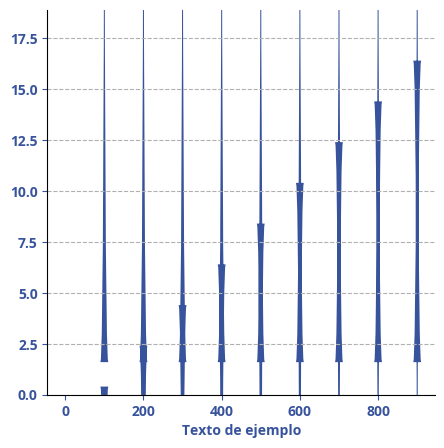

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.arange(0, 1000, 100)
y = 2*np.arange(10)
ax.bar(x, y)
ax.set_xlabel("Texto de ejemplo")
# Here we call the function to round the corners
round_corners(ax)
for patch in reversed(ax.patches):
  bb = patch.get_bbox()
  print(bb.width, bb.height)

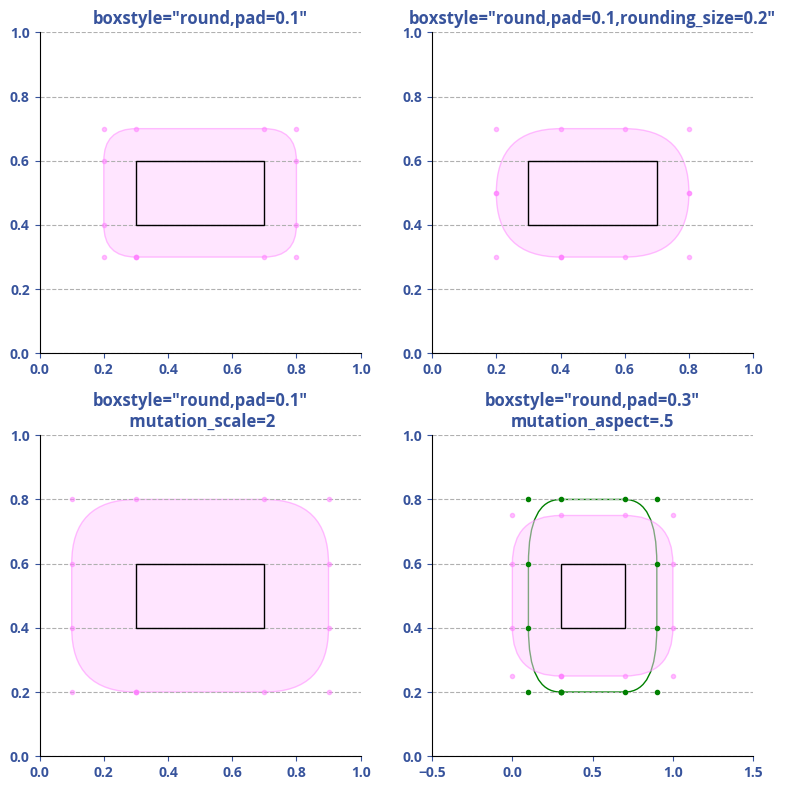

In [160]:
import matplotlib.transforms as mtransforms

def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch(bb.p0, bb.width, bb.height,
                           fc=(1, 0.8, 1, 0.5), ec=(1, 0.5, 1, 0.5),
                           **kwargs)
    ax.add_patch(fancy)
    return fancy


def draw_control_points_for_patches(ax):
    for patch in ax.patches:
        patch.axes.plot(*patch.get_path().vertices.T, ".",
                        c=patch.get_edgecolor())


fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])

ax = axs[0, 0]
# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"')

ax = axs[0, 1]
# bbox=round has two optional arguments: pad and rounding_size.
# They can be set during the initialization.
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
# The boxstyle and its argument can be later modified with set_boxstyle().
# Note that the old attributes are simply forgotten even if the boxstyle name
# is same.
fancy.set_boxstyle("round,pad=0.1,rounding_size=0.2")
# or: fancy.set_boxstyle("round", pad=0.1, rounding_size=0.2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1,rounding_size=0.2"')

ax = axs[1, 0]
# mutation_scale determines the overall scale of the mutation, i.e. both pad
# and rounding_size is scaled according to this value.
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.1", mutation_scale=2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"\n mutation_scale=2')

ax = axs[1, 1]
# When the aspect ratio of the axes is not 1, the fancy box may not be what you
# expected (green).
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.2")
fancy.set(facecolor="none", edgecolor="green")
# You can compensate this by setting the mutation_aspect (pink).
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.3", mutation_aspect=0.5)
ax.set(xlim=(-.5, 1.5), ylim=(0, 1), aspect=2,
       title='boxstyle="round,pad=0.3"\nmutation_aspect=.5')

for ax in axs.flat:
    draw_control_points_for_patches(ax)
    # Draw the original bbox (using boxstyle=square with pad=0).
    fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
    fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()


plt.show()

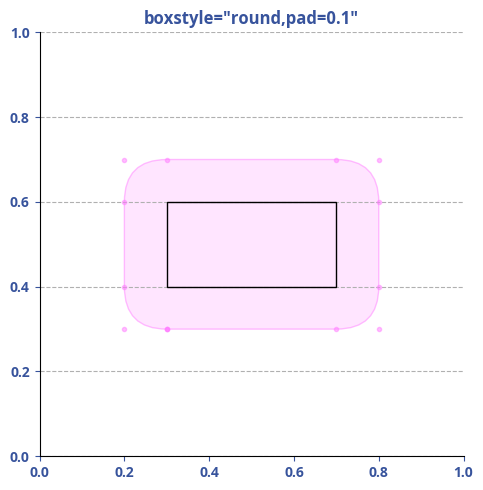

In [187]:
def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch(bb.p0, bb.width, bb.height,
                           fc=(1, 0.8, 1, 0.5), ec=(1, 0.5, 1, 0.5),
                           **kwargs)
    ax.add_patch(fancy)
    return fancy

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])

# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"')


draw_control_points_for_patches(ax)
# Draw the original bbox (using boxstyle=square with pad=0).
fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()


plt.show()

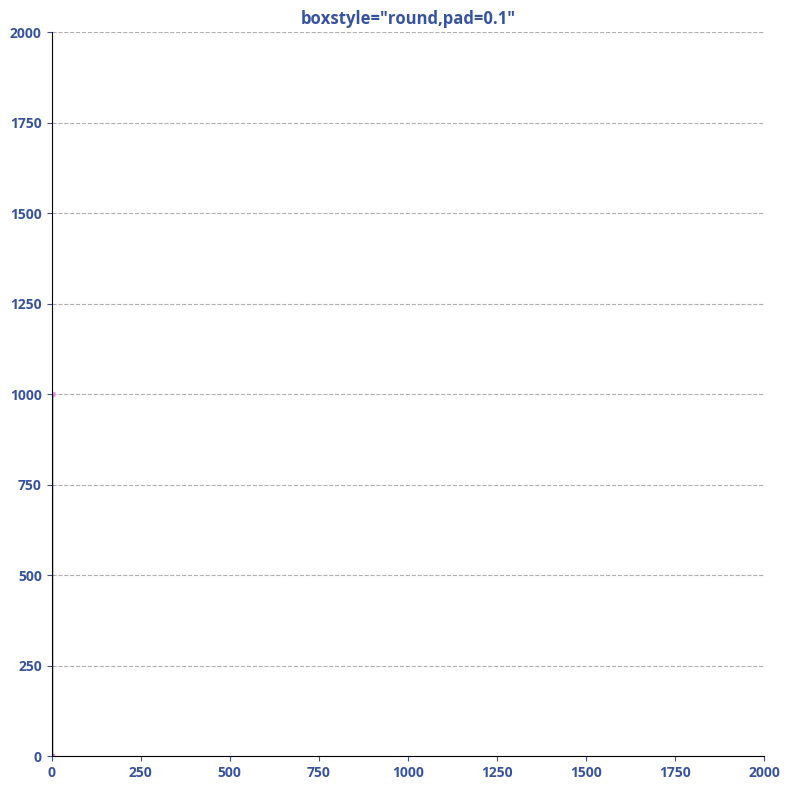

In [241]:
def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch((bb.xmin, bb.ymin), bb.width, bb.height,
                           fc=(1, 0.8, 1, 0.5), ec=(1, 0.5, 1, 0.5),
                           **kwargs)
    ax.add_patch(fancy)
    return fancy

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[1, 1], [1.8, 1000]])

# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round")
ax.set(xlim=(0, 2000), ylim=(0, 2000),
       title='boxstyle="round,pad=0.1"')


draw_control_points_for_patches(ax)
# Draw the original bbox (using boxstyle=square with pad=0).
fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()


plt.show()

0.8 0.0
0.8 0.2
0.8 0.4
0.8 0.6000000000000001
0.8 0.8
0.8 1.0
0.7999999999999999 1.2000000000000002
0.8 1.4000000000000001
0.8000000000000002 1.6
0.8 1.8


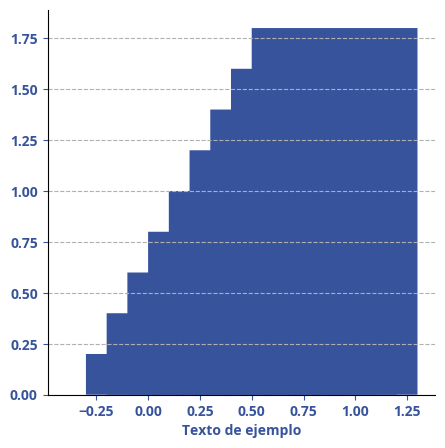

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.arange(0, 1, 0.1)
y = 2*x
ax.bar(x, y)
ax.set_xlabel("Texto de ejemplo")
# Here we call the function to round the corners
round_corners(ax)

for patch in reversed(ax.patches):
  bb = patch.get_bbox()
  print(bb.width, bb.height)

## Visualizar paleta de colores

NameError: name 'round_corners' is not defined

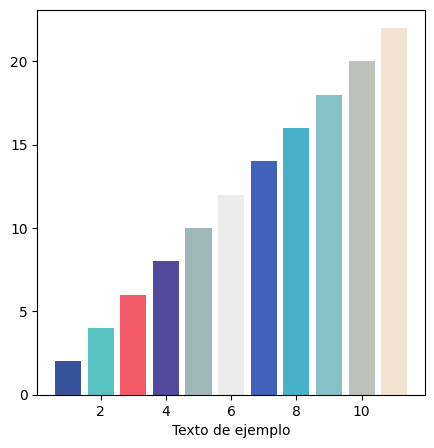

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.arange(1,12)
y = 2*x


ax.bar(x, y, color=COLOR_PALETTE)
ax.set_xlabel("Texto de ejemplo")
round_corners(ax)

NameError: name 'round_corners' is not defined

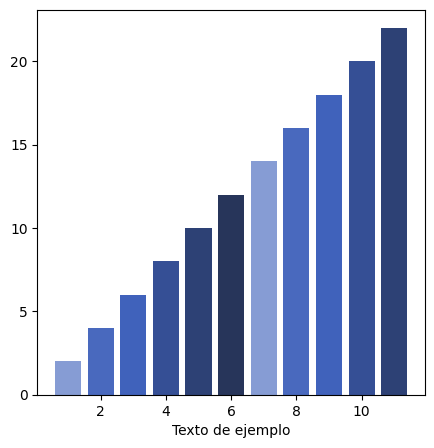

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.arange(1,12)
y = 2*x


ax.bar(x, y, color=BLUE_PALETTE)
ax.set_xlabel("Texto de ejemplo")
round_corners(ax)

### Otras consideraciones

- Además de guardar los gráficos en formato png (con 300 dpi), también deben ser guardados en .svg.